In [1]:
POP_SIZE = 100
TOURNAMENT_SIZE = 3
NUM_GENERATIONS = 500
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.05
ELITISM_PERCENTAGE = 0.1

from Utils import read_instance, check_solution, initialize_population, generate_next_generation
from matplotlib import pyplot as plt
import random

N, K, M, student_matrix = read_instance("small.txt")

print("N - Number of Exams:", N)
print("K - Number of Timeslots:", K)
print("M - Number of Students:", M)

N - Number of Exams: 15
K - Number of Timeslots: 6
M - Number of Students: 30


# **Assignment 1 - Timetabling Problem - Joey Galvin 22348861**

In [2]:
# print("\nMatrix:")
# for i, row in enumerate(student_matrix):
#     print(f"Student{i:2d}: {row}")

initial_population = initialize_population(POP_SIZE, N, K)
print("\nInitial Population:")
for i, solution in enumerate(initial_population):
    print(f"Solution {i}: {solution}")

fitnesses = [check_solution(solution, student_matrix) for solution in initial_population]

print("\nFitnesses:")
for i, fitness in enumerate(fitnesses):
    print(f"Solution {i}: Fitness = {fitness}")

print("Average Fitness:", sum(fitnesses)/len(fitnesses))



Initial Population:
Solution 0: [1, 4, 1, 1, 1, 4, 3, 4, 3, 1, 1, 1, 1, 0, 2]
Solution 1: [5, 2, 0, 2, 2, 4, 3, 2, 1, 5, 0, 2, 1, 1, 5]
Solution 2: [2, 0, 5, 4, 3, 5, 0, 5, 5, 1, 5, 2, 0, 5, 3]
Solution 3: [1, 4, 2, 3, 3, 5, 1, 4, 2, 5, 0, 1, 2, 0, 5]
Solution 4: [5, 3, 5, 0, 4, 1, 4, 2, 0, 0, 5, 2, 4, 2, 5]
Solution 5: [5, 0, 2, 3, 3, 3, 1, 4, 4, 4, 1, 1, 1, 3, 0]
Solution 6: [0, 1, 0, 0, 3, 1, 0, 2, 4, 0, 2, 5, 5, 0, 1]
Solution 7: [4, 4, 1, 0, 4, 4, 3, 4, 0, 4, 3, 3, 0, 1, 5]
Solution 8: [5, 5, 5, 3, 3, 3, 0, 3, 1, 5, 1, 0, 1, 1, 3]
Solution 9: [2, 4, 3, 0, 5, 4, 3, 4, 5, 3, 0, 3, 1, 3, 3]
Solution 10: [1, 2, 2, 5, 1, 5, 2, 4, 5, 1, 3, 3, 4, 3, 4]
Solution 11: [5, 0, 2, 0, 1, 0, 0, 5, 4, 5, 5, 4, 3, 1, 3]
Solution 12: [5, 4, 0, 0, 0, 2, 0, 4, 3, 2, 3, 1, 5, 1, 5]
Solution 13: [4, 1, 3, 2, 0, 2, 2, 5, 0, 5, 2, 5, 5, 3, 3]
Solution 14: [1, 0, 2, 3, 3, 2, 4, 1, 0, 3, 4, 4, 3, 3, 0]
Solution 15: [2, 5, 5, 2, 1, 3, 1, 0, 4, 1, 0, 4, 1, 4, 2]
Solution 16: [5, 1, 4, 3, 0, 5, 1, 0, 4, 5, 2

Now That I have got an initial population and their fitnesses, I will being to begin to implement the genetic algorithm. I will be using tournament selection, elitism, one-point crossover, and mutation to evolve the population over multiple generations.

In [3]:
next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, K, ELITISM_PERCENTAGE)
fitnesses = [check_solution(solution, student_matrix) for solution in next_gen_population]
print("Average Fitness:", sum(fitnesses)/len(fitnesses))

Average Fitness: 10.16


Next generation generated and average fitness collected, now need to automate this process over multiple generations and plot the increase in fitness over generations.

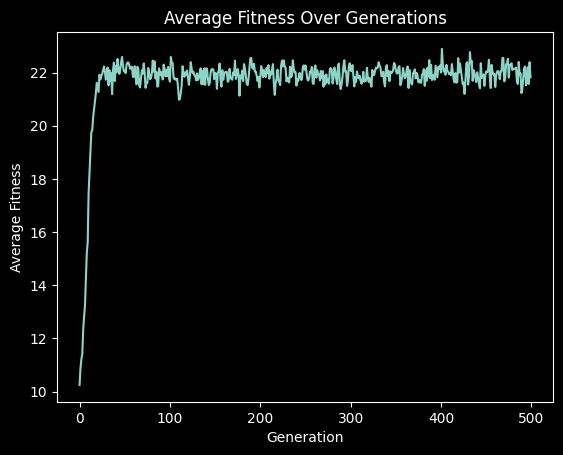

In [4]:
i = 0
avg_fitnesses = []
while i < NUM_GENERATIONS:
    next_gen_population = generate_next_generation(initial_population, student_matrix, POP_SIZE, TOURNAMENT_SIZE, CROSSOVER_RATE, MUTATION_RATE, K, ELITISM_PERCENTAGE)
    fitnesses = [check_solution(solution, student_matrix) for solution in next_gen_population]
    avg_fitness = sum(fitnesses)/len(fitnesses)
    avg_fitnesses.append(avg_fitness)
    print(f"Generation {i}: Average Fitness = {avg_fitness}")
    initial_population = next_gen_population
    i += 1

plt.plot(avg_fitnesses)
plt.xlabel("Generation")
plt.ylabel("Average Fitness")
plt.title("Average Fitness Over Generations")
plt.show()